🔹 First 5 Rows of Dataset:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB
None

🔹 Summary Statistics:
       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
me

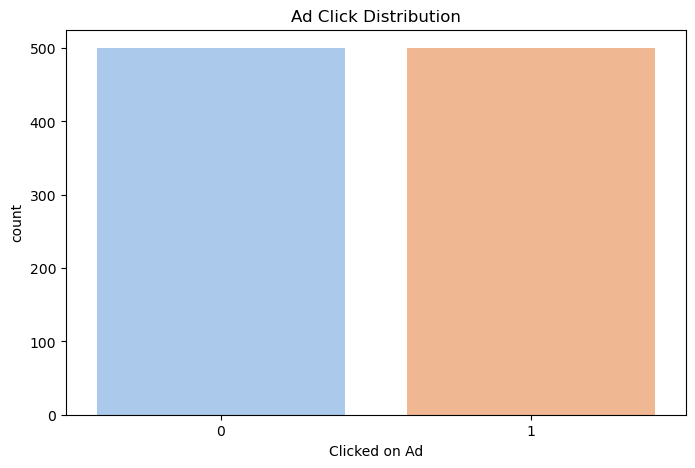

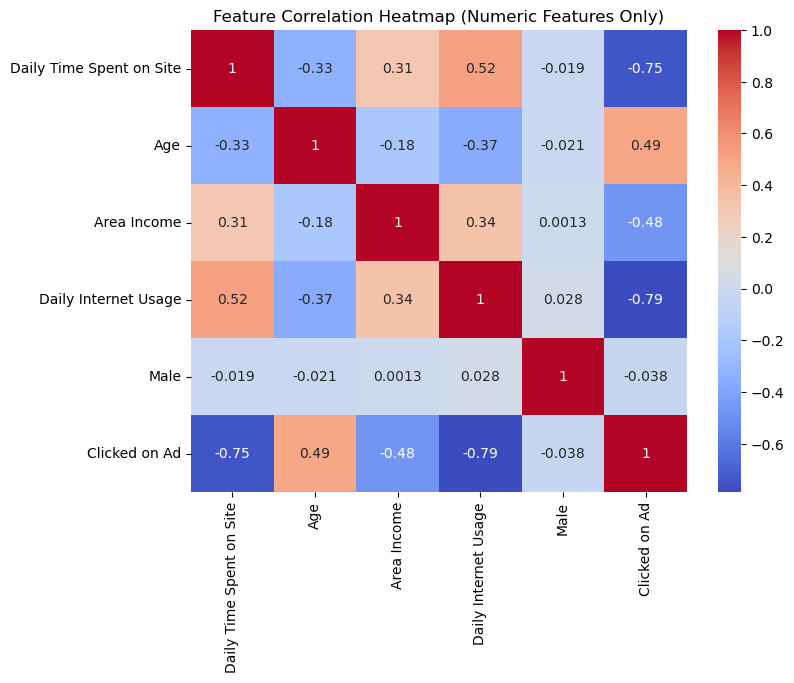


🔹 Model Evaluation Metrics:
Accuracy  : 0.9520
Precision : 0.9669
Recall    : 0.9360
F1 Score  : 0.9512
ROC-AUC   : 0.9875

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       125
           1       0.97      0.94      0.95       125

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



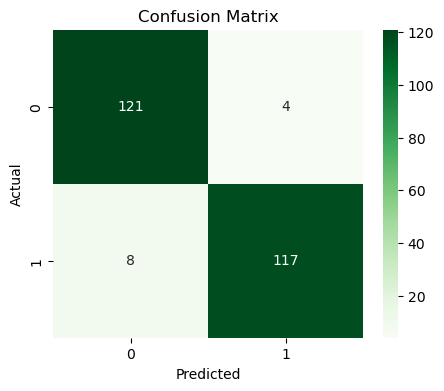

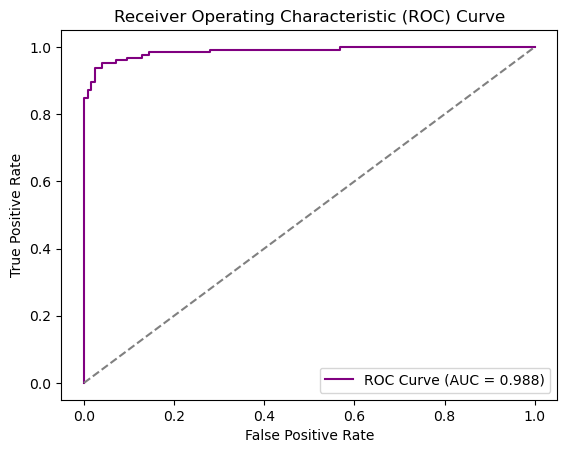


🔹 Cross-Validation Accuracy Scores: [0.965 0.955 0.98  0.955 0.96 ]
Average CV Accuracy: 0.963


In [1]:
# =============================================================
# Artificial Intelligence Minor Project
# Predictive Modeling for Click-Through Rate (CTR) Optimization
# Student: NAGESHWARI
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load Dataset
data = pd.read_csv("advertising.csv")  # ensure this file is in the same folder

# Step 2: Dataset Overview
print("🔹 First 5 Rows of Dataset:")
display(data.head())
print("\n🔹 Dataset Info:"); print(data.info())
print("\n🔹 Summary Statistics:"); print(data.describe())
print("\n🔹 Missing Values:"); print(data.isnull().sum())

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5)); sns.countplot(x='Clicked on Ad', data=data, palette='pastel'); plt.title('Ad Click Distribution'); plt.show()

# ✅ FIXED: Correlation Heatmap (Numeric Columns Only - Single Line)
plt.figure(figsize=(8,6)); sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm'); plt.title('Feature Correlation Heatmap (Numeric Features Only)'); plt.show()

# Step 4: Feature Selection
X = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = data['Clicked on Ad']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)

# Step 6: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Model Training
model = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

# Step 9: Evaluation
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("\n🔹 Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
plt.figure(figsize=(5,4)); sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens'); plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()

# Step 11: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='purple', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(); plt.show()

# Step 12: Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\n🔹 Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print("Average CV Accuracy:", round(cv_scores.mean(), 4))




🔹 First 5 Rows of Dataset:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB
None

🔹 Summary Statistics:
       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
me

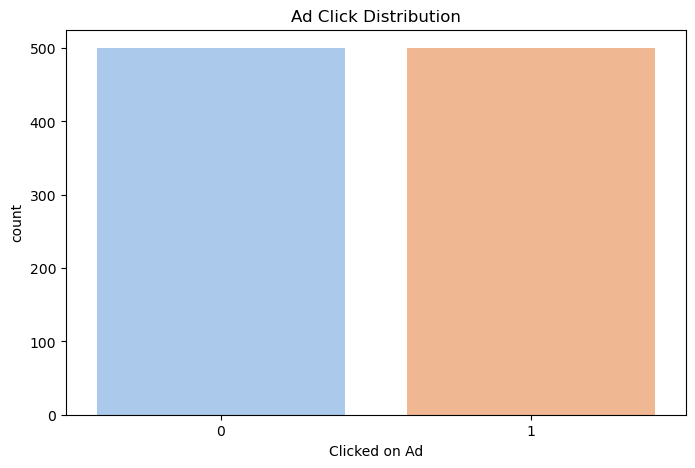

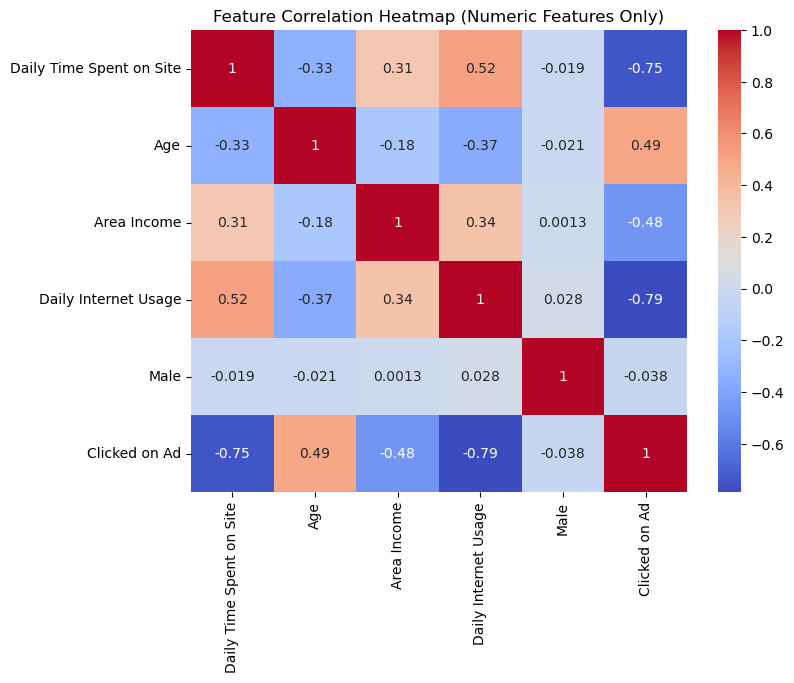


🔹 Model Evaluation Metrics:
Accuracy  : 0.9520
Precision : 0.9669
Recall    : 0.9360
F1 Score  : 0.9512
ROC-AUC   : 0.9875

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       125
           1       0.97      0.94      0.95       125

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



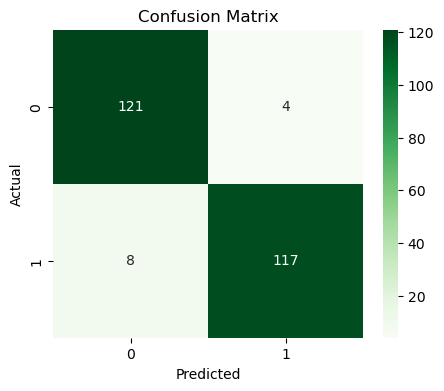

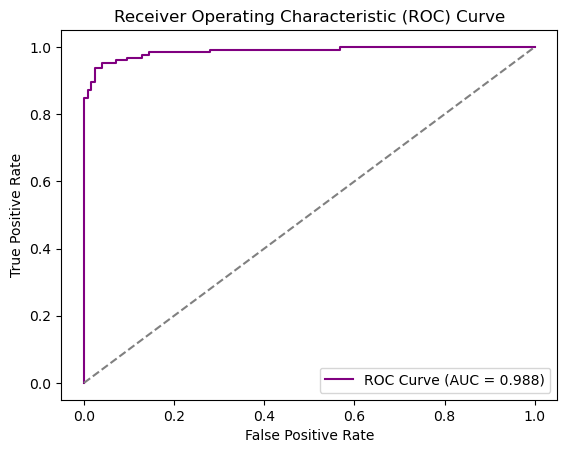


🔹 Cross-Validation Accuracy Scores: [0.965 0.955 0.98  0.955 0.96 ]
Average CV Accuracy: 0.963


In [1]:
# =============================================================
# Artificial Intelligence Minor Project
# Predictive Modeling for Click-Through Rate (CTR) Optimization
# Student: NAGESHWARI
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load Dataset
data = pd.read_csv("advertising.csv")  # ensure this file is in the same folder

# Step 2: Dataset Overview
print("🔹 First 5 Rows of Dataset:")
display(data.head())
print("\n🔹 Dataset Info:"); print(data.info())
print("\n🔹 Summary Statistics:"); print(data.describe())
print("\n🔹 Missing Values:"); print(data.isnull().sum())

# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5)); sns.countplot(x='Clicked on Ad', data=data, palette='pastel'); plt.title('Ad Click Distribution'); plt.show()

# ✅ FIXED: Correlation Heatmap (Numeric Columns Only - Single Line)
plt.figure(figsize=(8,6)); sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm'); plt.title('Feature Correlation Heatmap (Numeric Features Only)'); plt.show()

# Step 4: Feature Selection
X = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = data['Clicked on Ad']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)

# Step 6: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Model Training
model = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

# Step 9: Evaluation
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("\n🔹 Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
plt.figure(figsize=(5,4)); sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens'); plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.show()

# Step 11: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='purple', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(); plt.show()

# Step 12: Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\n🔹 Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print("Average CV Accuracy:", round(cv_scores.mean(), 4))


